<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/LU_cholesky_jacobi_gauss_seidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolucion de sistemas lineales


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from typing import Optional, Tuple
import time

## Directos

In [ ]:
def resolver_sistema_triangular(U: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Resuelve un sistema de la forma Ux = b donde U es una matrix triangular superior (a_ij = 0 si i<j)'''
    N = U.shape[0]
    x = np.empty(N)

    # Voy resolviendo de atras para adelante
    ## El primero es obvio
    x[-1] = b[-1]/U[-1,-1]

    ## Hago el resto
    for i in range(2,N+1):
        x[-i]= (b[-i] - np.dot(U[-i,-i+1:],x[-i+1:])) / U[-i, -i]
    return(x)

### Gauss

In [ ]:
def gauss(A: np.ndarray, b: np.ndarray):
    ''' Resuelve un sistema Ax=b via eliminación de Gauss'''
    N = len(A)
    for i in range(N-1): #Columnas
        #Acá habría que agregar el pivoteo en caso de ser necesario (ignorelo por ahora)
        for j in range(i+1,N): #Filas
            factor = A[j, i] / A[i, i]
            A[j,i] = A[j,i] - factor*A[i,i]
            b[j] -= factor * b[i]

    x = resolver_sistema_triangular(A, b)
    return x

In [ ]:
# Compruebo que el método ande correctamente
A=np.array([[2,3,1],[5,-2,-4],[5,-1,1]])
b=np.array([1,-3,4])
#A=np.array([[1,0,0],[0,1,0],[0,0,1]])
x = gauss(A,b)
C = np.linalg.inv(A)
y = np.dot(C,b)
B = np.array([[2,-4],[1,3]])
ds = np.array([4,-2])
print(y)
print(x)
x2 = gauss(B,ds)
print(x2)
print(np.linalg.solve(B,ds))

[ 4.25 -3.5   3.  ]
[ 4.25 -3.5   3.  ]
[-0.66666667 -1.33333333]
[-0.66666667 -1.33333333]


### LU

In [ ]:
def tiene_lu(A,eps): #eps es el epsilon de maquina
    #Dada una matriz A, devuelve True si tiene descomposición LU, o False en caso contrario


    res = True

    for i in range(np.shape(A)[0]):
      if np.abs(np.linalg.det(A[:i, :i])) < eps: #si el determinante esta muy cerca de 0, no s inversible
        res = False
    return res
    pass

def lu_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    if tiene_lu:

      for i in range(n):
        # Matriz L tiene unos en su diagonal
          L[i, i] = 1

        # Calcula la parte superior de la matriz U
          for j in range(i, n):
              U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))

        # Calcula la parte inferior de la matriz L
          for j in range(i + 1, n):
              L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

      return L, U
    else:
      print("No tiene factorizacion LU")

# Ejemplo de uso
A = np.array([[2, -1, 1], [1, 3, 2], [1, 1, 4]])
L, U = lu_decomposition(A)
print("Matriz L:")
print(L)
print("Matriz U:")
print(U)
print(L@U)

Matriz L:
[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.5        0.42857143 1.        ]]
Matriz U:
[[ 2.         -1.          1.        ]
 [ 0.          3.5         1.5       ]
 [ 0.          0.          2.85714286]]
[[ 2. -1.  1.]
 [ 1.  3.  2.]
 [ 1.  1.  4.]]


### Comparacion de tiempos

In [ ]:
A=np.array([[2,3,1],[5,-2,-4],[5,-1,1]])
b=np.array([1,-3,4])

arranque = time.time()
resultado = gauss(A,b)
tiempo_final = time.time()
print(f'Gauss tardó: {tiempo_final - arranque} segundos', "y el resultado es", resultado)

#Completar el resto y comparar
arranque = time.time()
L,U = lu_decomposition(A)
y = resolver_sistema_triangular(U, b)
x = gauss(L,y)
tiempo_final = time.time()
print(f'LU tardó: {tiempo_final - arranque} segundos', "y el resultado es", x)

Gauss tardó: 0.0012242794036865234 segundos y el resultado es [ 4.25 -3.5   3.  ]
LU tardó: 0.0003082752227783203 segundos y el resultado es [ 4.25 -3.5   3.  ]


In [ ]:
# Comparar con los metodos de numpy
x = np.linalg.inv(A).dot(b)
x = np.linalg.solve(A,b)
print(x)

[ 4.25 -3.5   3.  ]


Ahora voy a hacer un código que tenga cholesky

In [ ]:
def es_simetrica(A):
  for i in range(len(A)):
        for j in range(i, len(A)):  # Podemos empezar desde i para evitar comparar dos veces
            if A[i][j] != A[j][i]:
                return False


  return True

def es_definida_positiva(A):
    # Verificar si todos los autovalores son positivos
    autovalores = np.linalg.eigvals(A)
    return np.all(autovalores > 0) #devuelve true si todos los autovalores son mayores a 0

def cholesky(A):
  if es_simetrica(A) and es_definida_positiva(A):
    L,U = lu_decomposition(A)
    return L, L.T
  else:
    print(A, "no tiene descomposición de cholesky")

matriz1 = np.array([[4, 2, 2],[2, 2, 1],[2, 1, 3]])
matriz2 = np.array([[0, 2, 3],[2, 5, 6],[3, 1, 2]])
print(cholesky(matriz1))
print(cholesky(matriz2))


NameError: name 'np' is not defined

## Iterativos

Vamos a implementar los métodos de Jacobi y Gauss-Seidel.

Recuerde que:
$$
\begin{array}{c|c|c}
\textbf{Método} & \textbf{M} & \textbf{c}\\
\text{Jacobi} & M=-D^{-1}(L+U) & c=D^{-1}b\\
\text{Gauss-Seidel} & M=-(D+L)^{-1}U & c=(D+L)^{-1}b\\
\end{array}
$$


In [ ]:
def jacobi(A: np.ndarray, b: np.ndarray, x0: Optional[np.ndarray] = None, max_iter: int = 100) -> np.ndarray:
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U = np.triu(A,1)
    D_inv =np.linalg.inv(D)
    M = -D_inv@(L+U)
    c = D_inv@b

    if x0 is None:
        x0 = c

    # Guardo lugar para la sucesion
    # La fila i va a ser la aproximación en la iteración i
    # Las columnas van a ser las coordenadas de cada aproximación
    x = np.empty((max_iter, x0.size))

    for i in range(max_iter-1):
        x[i+1,:] = M @ x[i,:] + c

    return x

Probar el método con el siguiente sistema, sientase libre de arrancar con otro punto inicial

In [ ]:
A = np.array([[-3,1],[2,6]])
b = np.array([4,4])

x = jacobi(A,b) # Ponerle otro x0 para ver que pasa despues de que ande
print(A@x[-1])

# Plotear

[4. 4.]


In [ ]:
def gauss_seidel(A: np.ndarray, b: np.ndarray, x0: Optional[np.ndarray] = None, max_iter: int = 100) -> np.ndarray:
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U = np.triu(A,1)
    DL_inv = np.linalg.inv(D+L)

    M = -DL_inv@U
    c = DL_inv@b

    if x0 is None:
        x0 = c

    # Guardo lugar para la sucesion
    # La fila i va a ser la aproximación en la iteración i
    # Las columnas van a ser las coordenadas de cada aproximación
    x = np.empty((max_iter, x0.size))

    for i in range(max_iter-1):
        x[i+1,:] = M @ x[i,:] + c

    return x

Con el siguiente código van a tener las figuras que están en el PDF de la clase y les va a servir para probar el sistema.

Text(0, 0.5, 'y')

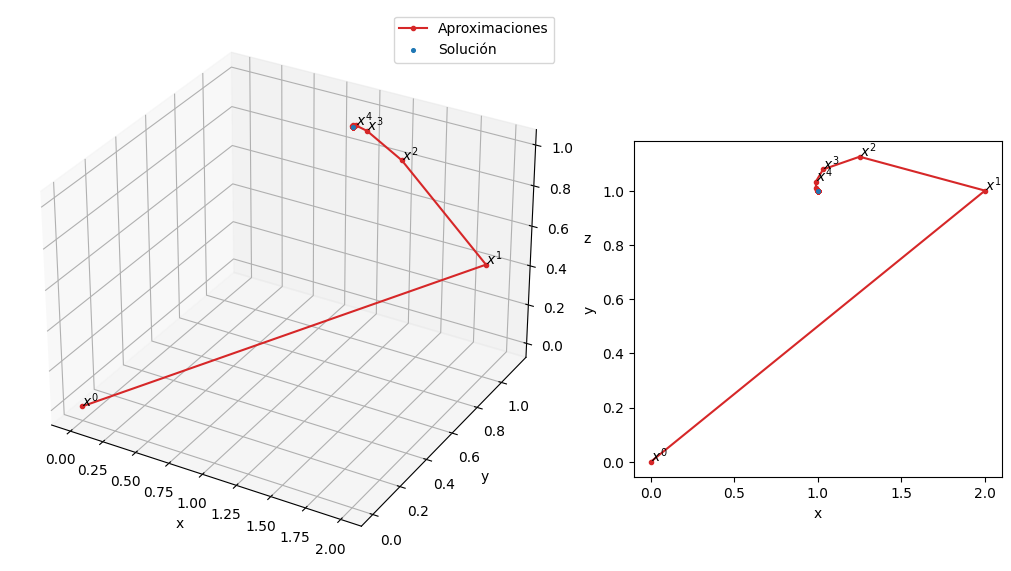

In [ ]:
A = np.array([[1,1/2,1/2],
              [1/2,1,1/2],
              [1/2,1/2,1]])
b = np.array([2,2,2])

x = gauss_seidel(A, b)

fig = plt.figure(figsize=(10,6), layout="constrained")
gs = GridSpec(3, 2, figure=fig, width_ratios=[0.6,0.4], height_ratios=[0.2,0.7,0.1])
ax = fig.add_subplot(gs[:,0],projection='3d')
ax_proj = fig.add_subplot(gs[1,1])

ax.plot(x[:,0], x[:,1], x[:,2], marker='.', color='tab:red', label='Aproximaciones', zorder=0)
for i in range(5):
    ax.text(x[i,0],x[i,1], x[i,2], f'$x^{i}$')
ax.scatter([1], [1], [1], color='tab:blue', label='Solución', zorder=1, s=7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

ax_proj.plot(x[:,0], x[:,1], marker='.', color='tab:red', label='Aproximaciones', zorder=0)
for i in range(5):
    ax_proj.text(x[i,0],x[i,1], f'$x^{i}$')
ax_proj.scatter([1], [1], color='tab:blue', label='Solución', zorder=1,s=7)
ax_proj.set_xlabel('x')
ax_proj.set_ylabel('y')

Pruebe resolver el sistema anterior con Jacobi, que ocurre?

In [ ]:
A = np.array([[1,1/2,1/2],
              [1/2,1,1/2],
              [1/2,1/2,1]])
b = np.array([2,2,2])

x = jacobi(A, b)
print(A@x[-1,:]) #el metodo no aproxima bien

[4. 4. 4.]
